In [2]:
os.listdir("catdog")

['.ipynb_checkpoints',
 'cat',
 'catdogclassifier.h5',
 'cattest.jpg',
 'dog',
 'dogtest2.jpg',
 'dogtest3.jpeg']

In [1]:
import tensorflow as tf
from tensorflow  import keras
from keras import models,layers
import matplotlib.pyplot as plt
import cv2
import os
import imghdr

C:\Users\Happy\AppData\Local\Temp\ipykernel_11828\323435020.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
!pip list


Package                   Version
------------------------- ---------------
absl-py                   2.1.0
aiofiles                  23.2.1
altair                    5.2.0
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
dm-tree                   0.1.8
executing                 2.0.1
fastapi          

In [3]:
cpu=tf.config.experimental.list_physical_devices("CPU")

In [4]:
cpu

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
data_dir="catdog"


In [6]:
img_exts=["jpeg","jpg","png","bmp"]

In [7]:
os.listdir(os.path.join(data_dir,"cat"))

['1.jpg',
 '1K4ftlEr6o_vZp82WeQsOYA.png',
 '2698192-bigthumbnail.jpg',
 '2c8e981280d108b806c2e07bfbcc15b9.jpg',
 '302b745e0fae52405129f42bcc5b372d.jpg',
 '360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg',
 '360_F_295949484_8BrlWkTrPXTYzgMn3UebDl1O13PcVNMU.jpg',
 '360_F_553343599_FSqGnuEyA1ypgs3aHg9oBvyUKVzQAalL.jpg',
 '360_F_585067989_N59ojLL6Q7jTzwmSbcLw6vIupLcMg8xO.jpg',
 '360_F_623141504_mMMZAQQT7smp8Cp34E5tPe0zqaxkoLn2.jpg',
 '360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg',
 '51NvBMoPoHL._AC_UF10001000_QL80_.jpg',
 '71O7DGJaitL.jpg',
 '7b1a66ca9f7335b7fb07ae81a946a6d4.jpg',
 '7fa0c37b437beebb4f78ff0f27169376.jpg',
 '81ij4F3woOS._AC_UF8941000_QL80_.jpg',
 '845053a65e046a0368c95017b790219a.jpg',
 '93691e82745e0015c27dbebe3539ab41.jpg',
 'adorable-cat.jpg',
 'ai-generated-8625146_640.jpg',
 'ASFRP23033-1_525x700.jpg',
 'august-8-international-cat-day-11-most-beautiful-cat-breeds.png',
 'august-8-international-cat-day-11-most-beautiful-cat-breeds2.png',
 'beautiful-cat-pictu

In [8]:
a=0
b=0
c=0
for labels in os.listdir(data_dir):
    for images in os.listdir(os.path.join(data_dir,labels)):
        image_path=os.path.join(data_dir,labels,images)
        a=a+1
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in img_exts:
                os.remove(image_path)
                b=b+1
        except Exception as e:
            print('issue with an image'.format(image_path))
            c+=1

In [9]:
cv=cv2.imread(os.path.join(data_dir,"cat","360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg"))

In [10]:
cv

array([[[180, 132,   0],
        [180, 132,   0],
        [179, 131,   0],
        ...,
        [195, 145,   1],
        [194, 144,   0],
        [194, 144,   0]],

       [[180, 131,   1],
        [179, 130,   0],
        [179, 130,   0],
        ...,
        [194, 144,   0],
        [194, 144,   0],
        [194, 144,   0]],

       [[179, 130,   2],
        [179, 130,   2],
        [179, 130,   2],
        ...,
        [194, 144,   0],
        [194, 144,   0],
        [194, 144,   0]],

       ...,

       [[176, 126,   0],
        [176, 126,   0],
        [176, 126,   0],
        ...,
        [219, 170,   0],
        [219, 170,   0],
        [219, 170,   0]],

       [[176, 126,   0],
        [176, 126,   0],
        [176, 126,   0],
        ...,
        [219, 170,   0],
        [219, 170,   0],
        [219, 170,   0]],

       [[176, 126,   0],
        [176, 126,   0],
        [176, 126,   0],
        ...,
        [220, 171,   1],
        [220, 171,   1],
        [220, 171,   1]]

(-0.5, 539.5, 359.5, -0.5)

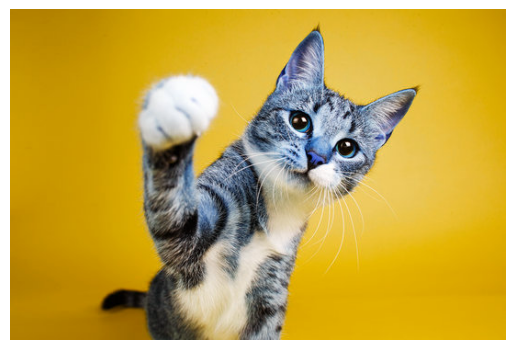

In [11]:
plt.imshow(cv)
plt.axis("off")

In [12]:
a

382

In [13]:
b

0

In [14]:
c

0

In [15]:
import numpy as  np

In [79]:
data=tf.keras.preprocessing.image_dataset_from_directory("catdog")

Found 381 files belonging to 2 classes.


In [80]:
data.class_names

['cat', 'dog']

In [18]:
data_iter=data.as_numpy_iterator()

In [19]:
data_iter

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002B2369FFC20>)

In [20]:
batch=data_iter.next()

In [21]:
batch[0].shape


(32, 256, 256, 3)

In [22]:
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

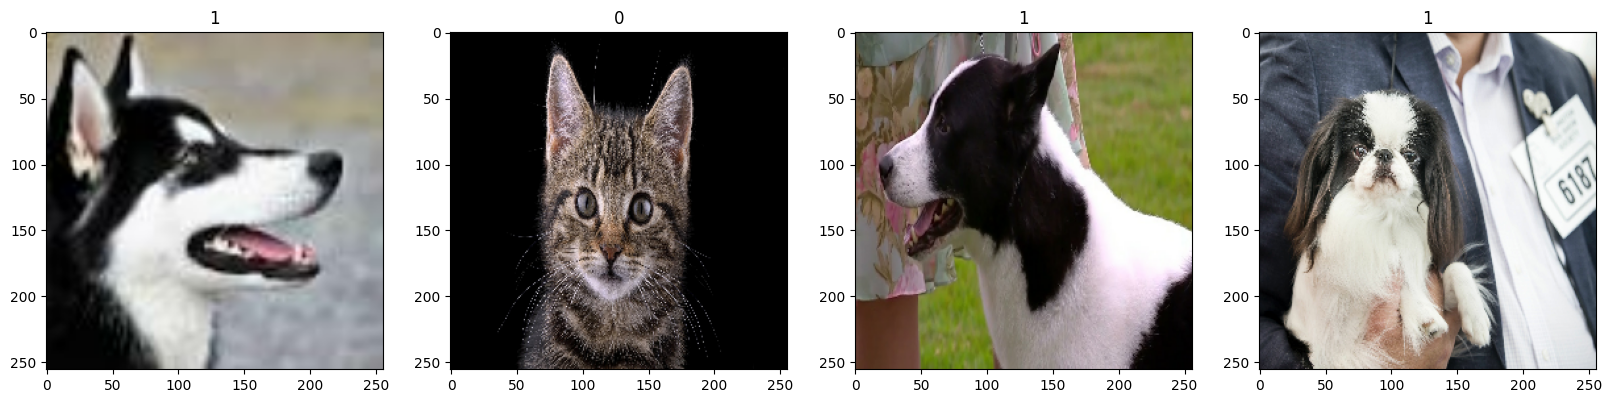

In [23]:
import matplotlib.pyplot as plt

# Assuming 'batch' contains your images and labels

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(batch[0][:4]):
   
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])  # Use set_title instead of title.set_text

plt.show()


In [24]:
batch[0].min()

0.0

In [25]:
batch[0].max()

255.0

In [26]:
data=data.map(lambda x,y:(x/255,y))

In [27]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
scaled=data.as_numpy_iterator().next()



In [29]:
scaled[0].max()

1.0

In [30]:
len(data)

12

In [31]:
train_size=int(len(data)*0.6)
test_size=int(len(data)*0.2)
val_size=int(len(data)*0.2)

In [32]:
train_size

7

In [33]:
val_size

2

In [34]:
test_size

2

In [35]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [36]:
len(train)

7

In [37]:
len(val)

2

In [38]:
len(test)

2

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [40]:
model=Sequential()

In [41]:
model.add(Conv2D(16,(2,2),1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(2,2),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(2,2),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(2,2),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\Happy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [42]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 16)          │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         921,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 936,769 (3.57 MB)

 Trainable params: 936,769 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
hist=model.fit(train,epochs=10,validation_data=val)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4899 - loss: 0.7193 - val_accuracy: 0.5781 - val_loss: 0.6843
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6092 - loss: 0.6853 - val_accuracy: 0.6406 - val_loss: 0.6781
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5652 - loss: 0.6680 - val_accuracy: 0.5000 - val_loss: 0.6613
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5676 - loss: 0.6654 - val_accuracy: 0.6719 - val_loss: 0.5999
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6526 - loss: 0.6033 - val_accuracy: 0.7500 - val_loss: 0.5393
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7414 - loss: 0.5260 - val_accuracy: 0.5625 - val_loss: 0.7436
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7615 - loss: 0.4791 - val_accuracy: 0.7500 - val_loss: 0.4763
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7394 - loss: 0.4850 - val_accuracy: 0.8438 - val_loss: 0.3625
Epoch 9/

In [45]:
hist.history

{'accuracy': [0.5223214030265808,
  0.6339285969734192,
  0.59375,
  0.6160714030265808,
  0.6517857313156128,
  0.7544642686843872,
  0.7276785969734192,
  0.7410714030265808,
  0.78125,
  0.8080357313156128],
 'loss': [0.7100524306297302,
  0.6821121573448181,
  0.6607502698898315,
  0.6479816436767578,
  0.5999504923820496,
  0.5238527655601501,
  0.507702112197876,
  0.5031105279922485,
  0.41933658719062805,
  0.39181405305862427],
 'val_accuracy': [0.578125,
  0.640625,
  0.5,
  0.671875,
  0.75,
  0.5625,
  0.75,
  0.84375,
  0.859375,
  0.84375],
 'val_loss': [0.6842827796936035,
  0.6781190633773804,
  0.6613084673881531,
  0.5998759269714355,
  0.5393158197402954,
  0.7436115741729736,
  0.47626471519470215,
  0.3624635338783264,
  0.3411579728126526,
  0.42480745911598206]}

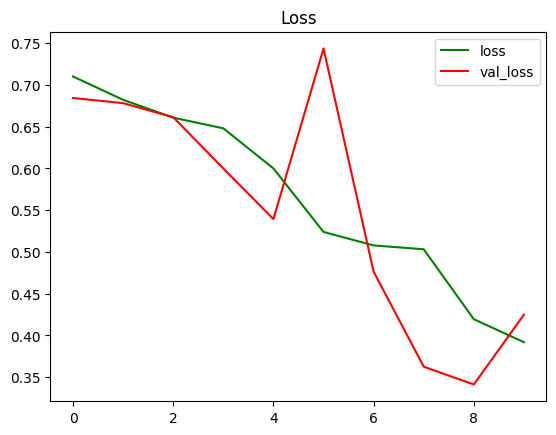

In [46]:
fig=plt.figure()
plt.plot(hist.history["loss"],color="green",label="loss")
plt.plot(hist.history["val_loss"],color="red",label="val_loss")
plt.title("Loss")
plt.legend()
plt.show()

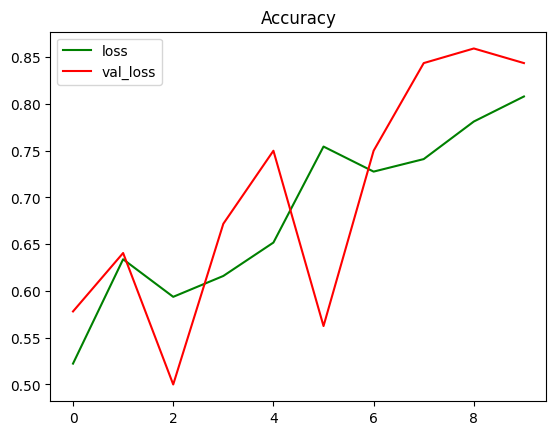

In [47]:
fig=plt.figure()
plt.plot(hist.history["accuracy"],color="green",label="loss")
plt.plot(hist.history["val_accuracy"],color="red",label="val_loss")
plt.title("Accuracy")
plt.legend()
plt.show()

In [48]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [49]:
pre=Precision()
re=Recall()
bin=BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    bin.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [51]:
print(f'Accuracy:{pre.result().numpy()},Recall:{re.result().numpy()},BinaryAccuracy:{bin.result().numpy()}')

Accuracy:0.9545454382896423,Recall:0.807692289352417,BinaryAccuracy:0.90625


In [52]:
import cv2

In [71]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\Happy\Music\folder_for_jupyter\catdog\dog\360_F_559274893_O9iSRQwTKIkAooNTglilMgx2yMcXK9Or.jpg")
print(img)


[[[14 16 16]
  [14 16 16]
  [14 16 16]
  ...
  [13 15 15]
  [15 15 15]
  [20 20 20]]

 [[14 16 16]
  [14 16 16]
  [14 16 16]
  ...
  [13 15 15]
  [15 15 15]
  [20 20 20]]

 [[14 16 16]
  [14 16 16]
  [14 16 16]
  ...
  [13 15 15]
  [15 15 15]
  [20 20 20]]

 ...

 [[14 16 17]
  [13 15 16]
  [12 14 15]
  ...
  [12 14 14]
  [13 15 15]
  [18 20 20]]

 [[14 16 17]
  [13 15 16]
  [12 14 15]
  ...
  [11 13 13]
  [13 15 15]
  [18 20 20]]

 [[14 16 17]
  [13 15 16]
  [12 14 15]
  ...
  [11 13 13]
  [13 15 15]
  [18 20 20]]]


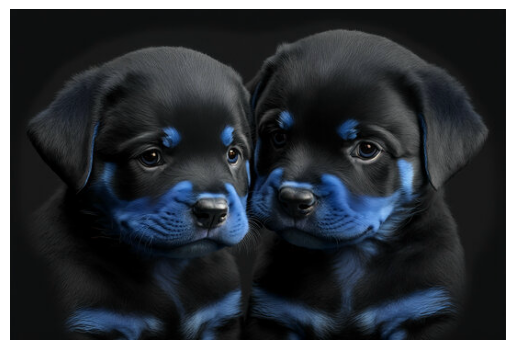

In [72]:
plt.imshow(img)
plt.axis("off")
plt.show()


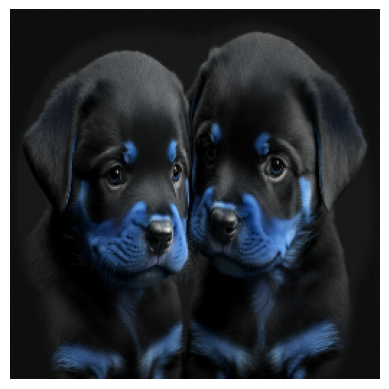

In [73]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.axis("off")
plt.show()

In [74]:
x=np.expand_dims(resize/255,0)
x

array([[[[0.05490196, 0.0627451 , 0.0627451 ],
         [0.05490196, 0.0627451 , 0.0627451 ],
         [0.05490196, 0.0627451 , 0.06666667],
         ...,
         [0.05490196, 0.0627451 , 0.06666667],
         [0.05618872, 0.06403186, 0.06403186],
         [0.06755514, 0.06755514, 0.06755514]],

        [[0.05490196, 0.0627451 , 0.0627451 ],
         [0.05490196, 0.0627451 , 0.0627451 ],
         [0.05490196, 0.0627451 , 0.06666667],
         ...,
         [0.05490196, 0.0627451 , 0.06666667],
         [0.05618872, 0.06403186, 0.06403186],
         [0.06755514, 0.06755514, 0.06755514]],

        [[0.05490196, 0.0627451 , 0.0627451 ],
         [0.05490196, 0.0627451 , 0.0627451 ],
         [0.05490196, 0.0627451 , 0.06666667],
         ...,
         [0.05490196, 0.0627451 , 0.06666667],
         [0.05483063, 0.06267377, 0.06267377],
         [0.06580883, 0.06580883, 0.06580883]],

        ...,

        [[0.05272672, 0.06056985, 0.06449142],
         [0.04705882, 0.05490196, 0.05882353]

In [75]:
x=(resize/255)
x

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.05490196, 0.0627451 , 0.0627451 ],
        [0.05490196, 0.0627451 , 0.0627451 ],
        [0.05490196, 0.0627451 , 0.06666667],
        ...,
        [0.05490196, 0.0627451 , 0.06666667],
        [0.05618872, 0.06403186, 0.06403186],
        [0.06755514, 0.06755514, 0.06755514]],

       [[0.05490196, 0.0627451 , 0.0627451 ],
        [0.05490196, 0.0627451 , 0.0627451 ],
        [0.05490196, 0.0627451 , 0.06666667],
        ...,
        [0.05490196, 0.0627451 , 0.06666667],
        [0.05618872, 0.06403186, 0.06403186],
        [0.06755514, 0.06755514, 0.06755514]],

       [[0.05490196, 0.0627451 , 0.0627451 ],
        [0.05490196, 0.0627451 , 0.0627451 ],
        [0.05490196, 0.0627451 , 0.06666667],
        ...,
        [0.05490196, 0.0627451 , 0.06666667],
        [0.05483063, 0.06267377, 0.06267377],
        [0.06580883, 0.06580883, 0.06580883]],

       ...,

       [[0.05272672, 0.06056985, 0.06449142],
        [0.04

In [76]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [77]:
yhat

array([[0.86473083]], dtype=float32)

In [78]:
if yhat>0.5:
    print("the given image is dog")
else:
    print("the given image is cat")

the given image is dog


In [73]:
from tensorflow.keras.models import load_model

In [74]:
model.save('catdog.keras')

In [96]:
import gradio as gr
import tensorflow as tf
import numpy as np

# Load your classification model
model = tf.keras.models.load_model('catdog.keras')

# Define a function to classify the uploaded image
def classify_image(image):
    # Preprocess the image
    
    image = np.array(image)
    image = tf.image.resize(image, (224, 224))  # Assuming your model expects 224x224 images
    image = np.expand_dims(image, axis=0)

    # Make predictions
    predictions = model.predict(image)
    if predictions>0.5:
        print("dog")
    else:
        print("cat")
  

interface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="label",
    title='Cat vs Dog Classifier',
    description='Upload an image and the classifier will determine whether it contains a cat or a dog.'
)

# Launch the interface
interface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\Happy\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\queueing.py", line 501, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Happy\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\route_utils.py", line 258, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Happy\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 1710, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Happy\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 1250, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Happy\AppData\Local\Programs\Python\Python312\Lib\site-p

In [81]:
pip install gradio tensorflow


Note: you may need to restart the kernel to use updated packages.
